# Яндекс.Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

Составьте первое представление о данных Яндекс.Музыки.




Основной инструмент аналитика — `pandas`. Импортируйте эту библиотеку.

In [2]:
# импорт библиотеки pandas и seaborn
import pandas as pd
import seaborn

Прочитайте файл `yandex_music_project.csv` из папки `/datasets` и сохраните его в переменной `df`:

In [3]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/yandex_music_project.csv')

Выведите на экран первые десять строк таблицы:

In [5]:
# получение первых 10 строк таблицы df
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Одной командой получить общую информацию о таблице:

In [8]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Не соблюдается "змеиный регистр" в наименовании столбца с идентификатором пользователя



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправьте стиль в заголовках столбцов, исключите пропуски. Затем проверьте данные на дубликаты.

### Стиль заголовков
Выведите на экран названия столбцов:

In [23]:
# перечень названий столбцов таблицы df
list(df.columns)

['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day']

Приведите названия в соответствие с хорошим стилем:
* несколько слов в названии запишите в «змеином_регистре»,
* все символы сделайте строчными,
* устраните пробелы.

Для этого переименуйте колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [28]:
# переименование столбцов
df = df.rename( columns={'  userID':'user_id','Track':'track','  City  ':'city','Day':'day'}  )

Проверьте результат. Для этого ещё раз выведите на экран названия столбцов:

In [29]:
# проверка результатов - перечень названий столбцов
list(df.columns)

['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day']

### Пропуски значений
Сначала посчитайте, сколько в таблице пропущенных значений. Для этого достаточно двух методов `pandas`:

In [45]:
# подсчёт пропусков
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для вашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Замените пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. Для этого создайте список `columns_to_replace`, переберите его элементы циклом `for` и для каждого столбца выполните замену пропущенных значений:

In [46]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['artist','track','genre']
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')

Убедитесь, что в таблице не осталось пропусков. Для этого ещё раз посчитайте пропущенные значения.

In [47]:
# подсчёт пропусков
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты
Посчитайте явные дубликаты в таблице одной командой:

In [48]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

Вызовите специальный метод `pandas`, чтобы удалить явные дубликаты:

In [49]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

Ещё раз посчитайте явные дубликаты в таблице — убедитесь, что полностью от них избавились:

In [50]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

Теперь избавьтесь от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведите на экран список уникальных названий жанров, отсортированный в алфавитном порядке. Для этого:
* извлеките нужный столбец датафрейма, 
* примените к нему метод сортировки,
* для отсортированного столбца вызовите метод, который вернёт уникальные значения из столбца.

In [51]:
# Просмотр уникальных названий жанров
df['genre'].sort_values().unique()


array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Просмотрите список и найдите неявные дубликаты названия `hiphop`. Это могут быть названия с ошибками или альтернативные названия того же жанра.

Вы увидите следующие неявные дубликаты:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишите функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [52]:
# Функция для замены неявных дубликатов

def replace_wrong_genres(correct_genre, wrong_genres):
    for wrong in wrong_genres:
        df['genre'] = df['genre'].replace(wrong, correct_genre)


Вызовите `replace_wrong_genres()` и передайте ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [53]:
# Устранение неявных дубликатов

# Помимо указанных в задании, мной были обнаружены следующие неявные дубликаты жанров:
# argentinetango -> tango
# электроника -> electronic
# afrikaans -> africa
# latino -> latin

# первый аргумент - правильное название жанра
# второй аргумент - список значений, которые нужно заменить
replace_wrong_genres('hiphop',['hip','hop','hip-hop'])
replace_wrong_genres('tango',['argentinetango'])
replace_wrong_genres('electronics',['электроника'])
replace_wrong_genres('africa',['afrikaans'])
replace_wrong_genres('latin',['latino'])


Проверьте, что заменили неправильные названия:

*   hip
*   hop
*   hip-hop

Выведите отсортированный список уникальных значений столбца `genre`:

In [54]:
# Проверка на неявные дубликаты
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'alternative',
       'alternativepunk', 'ambient', 'americana', 'animated', 'anime',
       'arabesk', 'arabic', 'arena', 'art', 'audiobook', 'author',
       'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom',
       'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian',
       'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop',
       'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber',
       'chanson', 'children', 'chill', 'chinese', 'choral', 'christian',
       'christmas', 'classical', 'classicmetal', 'club', 'colombian',
       'comedy', 'conjazz', 'contemporary', 'country', 'cuban', 'dance',
       'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock',
       'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat',
       'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy',
       'electronic', 'electronics', 'electropop', 'emo', 'entehno',
       'epicmetal', 'est

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверьте это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделите пользователей Москвы и Санкт-Петербурга
* Сравните, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Для тренировки сначала выполните каждый из расчётов по отдельности. 

Оцените активность пользователей в каждом городе. Сгруппируйте данные по городу и посчитайте прослушивания в каждой группе.



In [55]:
# Подсчёт прослушиваний в каждом городе
activity_moscow           = df.sort_values(by='city').groupby('city')['day'].count()[0]
activity_saint_petersburg = df.sort_values(by='city').groupby('city')['day'].count()[1]
print(f"Число прослушиваний за неделю в Москве: {activity_moscow}")
print(f"Число прослушиваний за неделю в Санкт-Петербурге: {activity_saint_petersburg}")

Число прослушиваний за неделю в Москве: 42741
Число прослушиваний за неделю в Санкт-Петербурге: 18512


В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируйте данные по дню недели и подсчитайте прослушивания в понедельник, среду и пятницу. Учтите, что в данных есть информация о прослушиваниях только за эти дни.


In [76]:
# Подсчёт прослушиваний в каждый из трёх дней
for k,v in df.groupby('day')['user_id'].count().items():
    print(k,v)

Friday 21840
Monday 21354
Wednesday 18059


В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Вы видели, как работает группировка по городу и по дням недели. Теперь напишите функцию, которая объединит два эти расчёта.

Создайте функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраните в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого примените последовательную фильтрацию с логической индексацией.

Затем посчитайте значения в столбце `user_id` получившейся таблицы. Результат сохраните в новую переменную. Верните эту переменную из функции.

In [77]:
# <создание функции number_tracks()>
# Объявляется функция с двумя параметрами: day, city.
# В переменной track_list сохраняются те строки таблицы df, для которых 
# значение в столбце 'day' равно параметру day и одновременно значение
# в столбце 'city' равно параметру city (используйте последовательную фильтрацию
# с помощью логической индексации).
# В переменной track_list_count сохраняется число значений столбца 'user_id',
# рассчитанное методом count() для таблицы track_list.
# Функция возвращает число - значение track_list_count.

# Функция для подсчёта прослушиваний для конкретного города и дня.
# С помощью последовательной фильтрации с логической индексацией она 
# сначала получит из исходной таблицы строки с нужным днём,
# затем из результата отфильтрует строки с нужным городом,
# методом count() посчитает количество значений в колонке user_id. 
# Это количество функция вернёт в качестве результата

def number_tracks(tracks_src, day, city):
    track_list = tracks_src.loc[ tracks_src.loc[:,'day' ] == day ]
    track_list = track_list.loc[ track_list.loc[:,'city'] == city]
    return track_list['user_id'].count()

Вызовите `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [78]:
# количество прослушиваний в Москве по понедельникам
listenings_moscow_monday = number_tracks(df, 'Monday','Moscow')

In [79]:
# количество прослушиваний в Санкт-Петербурге по понедельникам
listenings_saint_petersburg_monday = number_tracks(df, 'Monday','Saint-Petersburg')

In [80]:
# количество прослушиваний в Москве по средам
listenings_moscow_wednesday = number_tracks(df, 'Wednesday','Moscow')

In [81]:
# количество прослушиваний в Санкт-Петербурге по средам
listenings_saint_petersburg_wednesday = number_tracks(df, 'Wednesday','Saint-Petersburg')

In [82]:
# количество прослушиваний в Москве по пятницам
listenings_moscow_friday = number_tracks(df, 'Friday','Moscow')

In [83]:
# количество прослушиваний в Санкт-Петербурге по пятницам
listenings_saint_petersburg_friday = number_tracks(df, 'Friday','Saint-Petersburg')

Создайте c помощью конструктора `pd.DataFrame` таблицу, где
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, которые вы получили с помощью `number_tracks`.

In [86]:
# Таблица с результатами
columns = ['city', 'monday', 'wednesday', 'friday']
data = [
    ['Moscow',
    listenings_moscow_monday,
    listenings_moscow_wednesday,
    listenings_moscow_friday],
    ['Saint-Petersburg',
    listenings_saint_petersburg_monday,
    listenings_saint_petersburg_wednesday,
    listenings_saint_petersburg_friday]
]

city_listenings_per_days = pd.DataFrame(data = data, columns = columns)

city_listenings_per_days

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


График активности по Москве по дням недели


<AxesSubplot:>

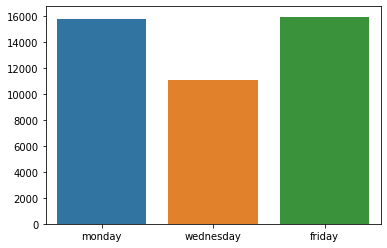

In [88]:
# График активности по Москве
print("График активности по Москве по дням недели")
seaborn.barplot(x=columns[1:],y=[listenings_moscow_monday,
    listenings_moscow_wednesday,
    listenings_moscow_friday])

График активности по Санкт-Петербургу по дням недели


<AxesSubplot:>

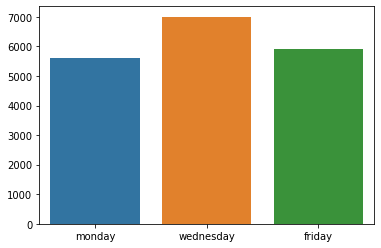

In [89]:
# График активности по Санкт-Петербургу
print("График активности по Санкт-Петербургу по дням недели")
seaborn.barplot(x=columns[1:], y=[listenings_saint_petersburg_monday,
    listenings_saint_petersburg_wednesday,
    listenings_saint_petersburg_friday])

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраните таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [90]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df.loc [ df.loc[:,'city'] == 'Moscow']

In [91]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general    = df.loc [ df.loc[:,'city'] == 'Saint-Petersburg']

Создайте функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [92]:
# Объявление функции genre_weekday() с параметрами table, day, time1, time2,
# которая возвращает информацию о самых популярных жанрах в указанный день в
# заданное время:
# 1) в переменную genre_df сохраняются те строки переданного датафрейма table, для
#    которых одновременно:
#    - значение в столбце day равно значению аргумента day
#    - значение в столбце time больше значения аргумента time1
#    - значение в столбце time меньше значения аргумента time2
#    Используйте последовательную фильтрацию с помощью логической индексации.
# 2) сгруппировать датафрейм genre_df по столбцу genre, взять один из его
#    столбцов и посчитать методом count() количество записей для каждого из
#    присутствующих жанров, получившийся Series записать в переменную
#    genre_df_count
# 3) отсортировать genre_df_count по убыванию встречаемости и сохранить
#    в переменную genre_df_sorted
# 4) вернуть Series из 10 первых значений genre_df_sorted, это будут топ-10
#    популярных жанров (в указанный день, в заданное время)

def genre_weekday(table, day, time1, time2):
    genre_df =    table.loc[ table.loc[:,'day'] == day ]
    genre_df = genre_df.loc[ genre_df.loc[:,'time'] > time1 ]
    genre_df = genre_df.loc[ genre_df.loc[:,'time'] < time2 ]
    
    genre_df_count = genre_df.groupby('genre')['user_id'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    
    return genre_df_sorted[:10]

Cравните результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

<AxesSubplot:ylabel='genre'>

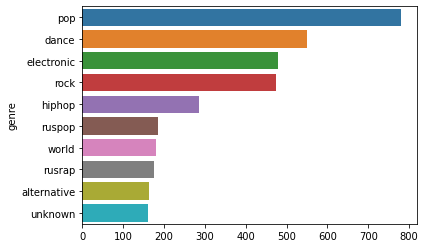

In [93]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
# пример вызова: genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
genre_data = genre_weekday( moscow_general, 'Monday', '07:00', '11:00')
seaborn.barplot(x=genre_data.values, y=genre_data.index)


<AxesSubplot:ylabel='genre'>

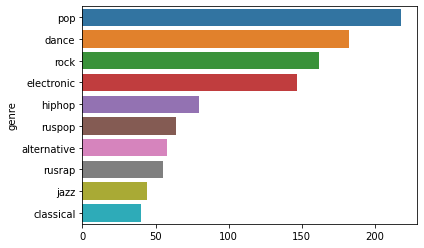

In [94]:
# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
genre_data = genre_weekday( spb_general, 'Monday', '07:00', '11:00')
seaborn.barplot(x=genre_data.values, y=genre_data.index)

<AxesSubplot:ylabel='genre'>

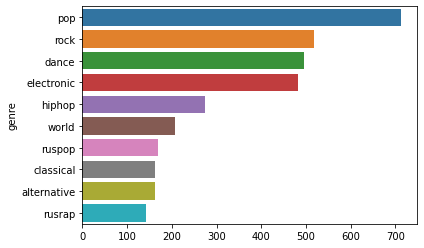

In [95]:
# вызов функции для вечера пятницы в Москве
genre_data = genre_weekday( moscow_general, 'Friday', '17:00', '23:00')
seaborn.barplot(x=genre_data.values, y=genre_data.index)

<AxesSubplot:ylabel='genre'>

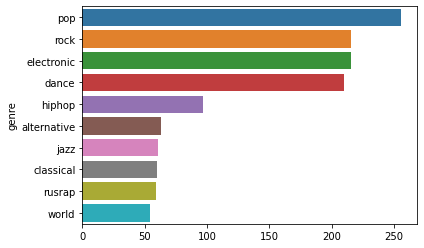

In [96]:
# вызов функции для вечера пятницы в Петербурге
genre_data = genre_weekday( spb_general, 'Friday', '17:00', '23:00')
seaborn.barplot(x=genre_data.values, y=genre_data.index)

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируйте таблицу `moscow_general` по жанру и посчитайте прослушивания треков каждого жанра методом `count()`. Затем отсортируйте результат в порядке убывания и сохраните его в таблице `moscow_genres`.

In [97]:
# одной строкой: группировка таблицы moscow_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в moscow_genres

moscow_genres = moscow_general.groupby('genre')['user_id'].count().sort_values(ascending=False)

Выведите на экран первые десять строк `moscow_genres`:

<AxesSubplot:ylabel='genre'>

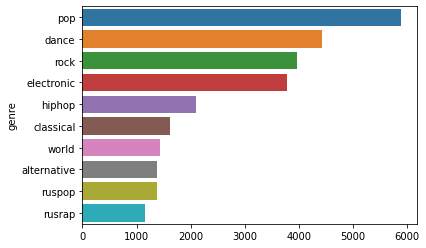

In [98]:
# просмотр первых 10 строк moscow_genres
seaborn.barplot(x=moscow_genres[:10].values,y=moscow_genres[:10].index)

Теперь повторите то же и для Петербурга.

Сгруппируйте таблицу `spb_general` по жанру. Посчитайте прослушивания треков каждого жанра. Результат отсортируйте в порядке убывания и сохраните в таблице `spb_genres`:


In [99]:
# одной строкой: группировка таблицы spb_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в spb_genres
spb_genres = spb_general.groupby('genre')['user_id'].count().sort_values(ascending=False)

Выведите на экран первые десять строк `spb_genres`:

<AxesSubplot:ylabel='genre'>

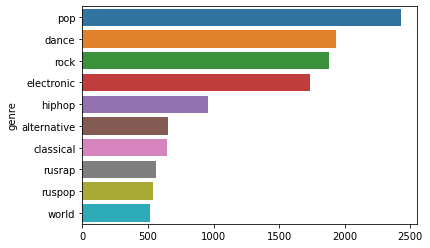

In [100]:
# просмотр первых 10 строк spb_genres
seaborn.barplot(x=spb_genres[:10].values,y=spb_genres[:10].index)

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 
С методами проверок гипотез вы ещё познакомитесь в следующих темах.